In [2]:
import numpy
from PIL import Image, ImageDraw

# read image as RGB (without alpha)
img = Image.open("C:\\Users\\valko\\Documents\\Thesis_Data\\Bursera penicillata\\img\\Burspen_TEX_Holmes_10286_16Jul1999.jpg").convert("RGB")



In [5]:
img.size


(3840, 5760)

In [3]:
len(img)

TypeError: object of type 'Image' has no len()

In [6]:
# convert to numpy (for convenience)
img_array = numpy.asarray(img)

# create mask
polygon = [(444,203),(623,243),(691,177),(581,26),(482,42)]

# create new image ("1-bit pixels, black and white", (width, height), "default color")
mask_img = Image.new('1', (img_array.shape[1], img_array.shape[0]), 0)

ImageDraw.Draw(mask_img).polygon(polygon, outline=1, fill=1)
mask = numpy.array(mask_img)

# assemble new image (uint8: 0-255)
new_img_array = numpy.empty(img_array.shape, dtype='uint8')

# copy color values (RGB)
new_img_array[:,:,:3] = img_array[:,:,:3]

# filtering image by mask
new_img_array[:,:,0] = new_img_array[:,:,0] * mask
new_img_array[:,:,1] = new_img_array[:,:,1] * mask
new_img_array[:,:,2] = new_img_array[:,:,2] * mask

# back to Image from numpy
newIm = Image.fromarray(new_img_array, "RGB")
newIm.save("out.jpg")

In [7]:
newIm.show()

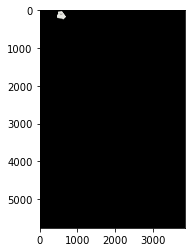

In [8]:
from matplotlib.pyplot import imshow


imshow(new_img_array)